# SIT744 Assignment 2: Efficient Training of Convolutional Neural Network 

<div class="alert-info">
    <p>Due: <strong>11:59pm 21 September 2020</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>45%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~18%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~2%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [1]:
!pip install tensorflow

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [26]:
from keras.callbacks import ModelCheckpoint

#we rescale the model for smoothness 
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#Breaking training data into training(50000) and validation(10000) sets
(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]

# Reshaping input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()

# we will define the shape of the input in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# taking a look at the summary of our model

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=75,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/75
782/782 [==============================] - ETA: 0s - loss: 0.6250 - accuracy: 0.7689
Epoch 00001: val_loss improved from inf to 0.41385, saving model to model.weights.best.hdf5
782/782 [==============================] - 4s 5ms/step - loss: 0.6250 - accuracy: 0.7689 - val_loss: 0.4138 - val_accuracy: 0.8456
Epoch 2/75
775/782 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.8417
Epoch 00002: val_loss improved from 0.41385 to 0.34885, saving model to model.weights.best.hdf5
782/782 [==============================] - 4s 5ms/step - loss: 0.4333 - accuracy: 0.8415 - val_loss: 0.3489 - val_accuracy: 0.8757
Epoch 3/75
776/782 [============================>.] - ETA: 0s - loss: 0.3847 - accuracy: 0.8593
Epoch 00003: val_loss improved from 0.34885 to 0.31546, saving model to model.weights.best.hdf5
782/782 [==============================] - 3s 4ms/step - loss: 0.3845 - accuracy: 0.8595 - val_loss: 0.3155 - val_accuracy: 0.8849
Epoch 4/75
776/782 [===============

In [3]:
model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
# Printing the test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9236999750137329


### Task 1.2 Train a ConvNet from scratch

*(weight ~2%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Reshaping input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#we rescale the model for smoothness 
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
from numpy import mean
import pandas as pd

scores, histories = list(), list()

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#select rows for train and test
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50)
  
#Model Evaluation
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
 
#storing scores
scores.append(acc)
histories.append(history)
print("Accuracy:",acc*100)

comparison_df = pd.DataFrame(columns=['configuration','accuracy'])
row={'configuration': 'ConvNet', 'accuracy': acc*100}
comparison_df=comparison_df.append(row,ignore_index=True)

final_comparison_df = pd.DataFrame(columns=['configuration','accuracy'])
row={'configuration': 'ConvNet', 'accuracy': acc*100}
final_comparison_df=final_comparison_df.append(row,ignore_index=True)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4119 - accuracy: 0.8533 - val_loss: 0.3245 - val_accuracy: 0.8852
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9021 - val_loss: 0.2776 - val_accuracy: 0.8991
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2220 - accuracy: 0.9197 - val_loss: 0.2724 - val_accuracy: 0.9038
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1796 - accuracy: 0.9352 - val_loss: 0.2706 - val_accuracy: 0.9078
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1456 - accuracy: 0.9470 - val_loss: 0.2770 - val_accuracy: 0.9093
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1183 - accuracy: 0.9574 - val_loss: 0.2850 - val_accuracy: 0.9091
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9658 - val_loss: 0.3209 - val_accuracy:


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~4%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

scores, histories = list(), list()

train_datagen = ImageDataGenerator(rotation_range=90, # rotating
                                  width_shift_range=0.2, # horizontal shifting
                                  height_shift_range=0.2, # vertical shifting
                                  horizontal_flip=True, # horizontal fliping
                                  vertical_flip=True, #horizontal fliping
                                  brightness_range=[0.2,1.2]) # marking brightness)

(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]

#Training using ImageDataGenerator
#Same model used as above (Task 1.2)
history = model.fit(train_datagen.flow(x_train, y_train,
                                     batch_size=32),
                    epochs=50,
                    validation_data=(x_valid,y_valid))

#Model Evaluation
_, acc = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy",acc*100)

#storing scores
scores.append(acc)
histories.append(history)

row={'configuration': 'ImageDataGenerator', 'accuracy': acc*100}
comparison_df=comparison_df.append(row,ignore_index=True)

row={'configuration': 'ImageDataGenerator', 'accuracy': acc*100}
final_comparison_df=final_comparison_df.append(row,ignore_index=True)

Epoch 1/50
1563/1563 [==============================] - 32s 21ms/step - loss: 14.8818 - accuracy: 0.0979 - val_loss: 2.3020 - val_accuracy: 0.1015
Epoch 2/50
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3077 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1022
Epoch 3/50
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3044 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 4/50
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3031 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0942
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1019
Epoch 6/50
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3030 - accuracy: 0.1018 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 7/50
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3029 - accuracy: 0.0970 - val_loss: 2.3027 

### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~6%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [7]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# transform to rgb as required by VGG
train_img=tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=3)) 
test_img=tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=3))

#resize to minimum size of (32x32)
train_img=tf.image.resize_with_pad(train_img,32,32)
test_img=tf.image.resize_with_pad(test_img,32,32)

train_img = train_img / 255.
test_img = test_img / 255.

#preprocessing as required by VGG16
train_img=preprocess_input(train_img)
test_img=preprocess_input(test_img)

In [8]:
#With Fine Tuning

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow import keras


#using model without last layers
vgg16=VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

layer_dict = dict([(layer.name, layer) for layer in vgg16.layers])

#stop at block3_pool and get output
output = layer_dict['block3_pool'].output

x = keras.layers.Flatten()(output)
x = keras.layers.Dense(32, activation='relu')(x)
x = keras.layers.Dense(10)(x)

final = keras.models.Model(inputs=vgg16.input, outputs=x)
for layer in final.layers[:10]:
  layer.trainable = False

final.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

final.fit(train_img, y_train, epochs=50, validation_split=0.2,batch_size=256,)

#Model Evaluation
_, acc = final.evaluate(test_img, y_test, verbose=0)
print('Accuracy: %.3f' % (acc*100))

row={'configuration': 'Transfer Learning with Fine Tuning', 'accuracy': acc*100}
comparison_df=comparison_df.append(row,ignore_index=True)

row={'configuration': 'Transfer Learning with Fine Tuning', 'accuracy': acc*100}
final_comparison_df=final_comparison_df.append(row,ignore_index=True)

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/50
188/188 [==============================] - 3s 15ms/step - loss: 12.3160 - accuracy: 0.1000 - val_loss: 12.3598 - val_accuracy: 0.0983
Epoch 2/50
188/188 [==============================] - 2s 12ms/step - loss: 12.3867 - accuracy: 0.1004 - val_loss: 12.3598 - val_accuracy: 0.0983
Epoch 3/50
188/188 [==============================] - 2s 12ms/step - loss: 12.3866 - accuracy: 0.1004 - val_loss: 12.3598 - val_accuracy: 0.0983
Epoch 4/50
188/188 [==============================] - 2s 12ms/step - loss: 12.3867 - accuracy: 0.1004 - val_loss: 12.3598 - val_accuracy: 0.0983
Epoch 5/50
188/188 [==============================] - 2s 12ms/step - loss: 12.3867 - accuracy: 0.1004 - val_loss: 12.3598 - val_accuracy: 0.0983
Epoch 6/50
188/188 [==============================] - 2s 12ms/step - loss: 12.3867 - accuracy: 0.1004 - val_loss: 12.3598 - val_accuracy: 0.0983
Epoch 7/50
188/188 [==============================] - 2s 12ms/ste

In [9]:
#Without fine tuning

from keras.applications.vgg16 import VGG16

base_model = VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3),
    include_top=False)

base_model.trainable = False

inputs = keras.Input(shape=(32, 32, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier
outputs = keras.layers.Dense(10)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_img, y_train, epochs=50, validation_split=0.2)

#Model Evaluation
_, acc = final.evaluate(test_img, y_test, verbose=0)
print('Accuracy: %.3f' % (acc*100))

row={'configuration': 'Transfer Learning without Fine Tuning', 'accuracy': acc*100}
comparison_df=comparison_df.append(row,ignore_index=True)

row={'configuration': 'Transfer Learning without Fine Tuning', 'accuracy': acc*100}
final_comparison_df=final_comparison_df.append(row,ignore_index=True)

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 5.2859 - accuracy: 0.1011 - val_loss: 5.3716 - val_accuracy: 0.0957
Epoch 2/50
1500/1500 [==============================] - 12s 8ms/step - loss: 5.2859 - accuracy: 0.1011 - val_loss: 5.3716 - val_accuracy: 0.0957
Epoch 3/50
1500/1500 [==============================] - 12s 8ms/step - loss: 5.2859 - accuracy: 0.1011 - val_loss: 5.3716 - val_accuracy: 0.0957
Epoch 4/50
1500/1500 [==============================] - 12s 8ms/step - loss: 5.2859 - accuracy: 0.1011 - val_loss: 5.3716 - val_accuracy: 0.0957
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 5.2859 - accuracy: 0.1011 - val_loss: 5.3716 - val_accuracy: 0.0957
Epoch 6/50
1500/1500 [==============================] - 12s 8ms/step - loss: 5.2859 - accuracy: 0.1011 - val_loss: 5.3716 - val_accuracy: 0.0957
Epoch 7/50
1500/1500 [==============================] - 12s 8ms/step - loss: 5.2859 - accuracy: 0.1011 - val_loss: 5.3716 - val_ac

### Task 1.5 Performance comparison

*(weight ~4%)*

Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?


In [10]:
comparison_df

,configuration,accuracy
0,ConvNet,88.929999
1,ImageDataGenerator,10.000000
2,Transfer Learning with Fine Tuning,10.000000
3,Transfer Learning without Fine Tuning,10.000000


In [11]:
highest=comparison_df['accuracy'].max()
print("The highest accuracy is observed for:\n")
comparison_df[comparison_df['accuracy']==highest]

The highest accuracy is observed for:



,configuration,accuracy
0,ConvNet,88.929999


In [12]:
print("CNN is considered to perform best because of it's architecture. \nThe system first generates filtered invariant features using convolution of images and then passes it to the next layer ")

CNN is considered to perform best because of it's architecture. 
The system first generates filtered invariant features using convolution of images and then passes it to the next layer 


## **End of task 1**

## Task 2 Fast training of deep networks

*(weight ~16%)*

###### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~6%, each subquestion worths ~2%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [13]:
!pip install gputil
import GPUtil
from tabulate import tabulate
print("="*40, "GPU Details", "="*40)
gpus = GPUtil.getGPUs()
list_gpus = []
count = 0
for gpu in gpus:
    print("GPU Number:", count+1)
    # name of GPU
    print("GPU Name:",gpu.name)
    # get free memory in MB format
    print("GPU Free Memory:", gpu.memoryFree)
    # get used memory
    print("GPU Used Memory:", gpu.memoryUsed)
    # get total memory
    print("GPU Total Memory:", gpu.memoryTotal)

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=bfa3625c7de14305bda07b3e1a2165146041eb1f113436be08ec5bcf0b08d58b
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
======================================== GPU Details ========================================
GPU Number: 1
GPU Name: Tesla P100-PCIE-16GB
GPU Free Memory: 11479.0
GPU Used Memory: 4801.0
GPU Total Memory: 16280.0


In [14]:
!pip install psutil
import platform
import psutil

print("="*40, "CPU Info", "="*40)
#processor name
print("Processor Name: ",platform.processor())
# number of cores
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
print("CPU Frequency: ",psutil.cpu_freq())

======================================== CPU Info ========================================
Processor Name:  x86_64
Total cores: 4
CPU Frequency:  None


#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [15]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = tf.keras.datasets.cifar10.load_data()

y_train_c = tf.keras.utils.to_categorical(y_train_c)
y_test_c = tf.keras.utils.to_categorical(y_test_c)

#we rescale the model for smoothness 
x_train_c = x_train_c.astype('float32')/255.0
x_test_c = x_test_c.astype('float32')/255.0

170500096/170498071 [==============================] - 3s 0us/step


Epoch 1/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7630 - accuracy: 0.3616 - val_loss: 1.4968 - val_accuracy: 0.4689
Epoch 2/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3923 - accuracy: 0.4985 - val_loss: 1.3351 - val_accuracy: 0.5224
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2216 - accuracy: 0.5655 - val_loss: 1.1341 - val_accuracy: 0.6032
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0933 - accuracy: 0.6141 - val_loss: 1.0989 - val_accuracy: 0.6143
Epoch 5/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9972 - accuracy: 0.6508 - val_loss: 0.9987 - val_accuracy: 0.6485
Epoch 6/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9118 - accuracy: 0.6801 - val_loss: 0.9829 - val_accuracy: 0.6581
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8422 - accuracy: 0.7060 - val_loss: 0.9533 - val_accuracy:

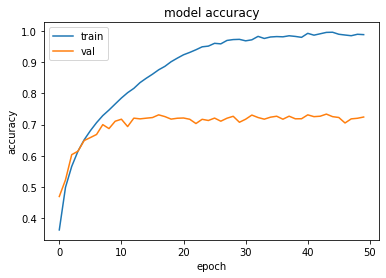

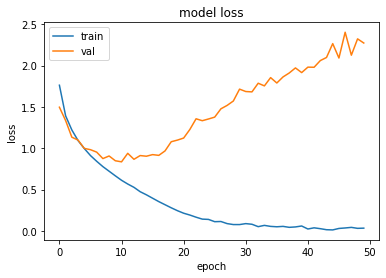

In [16]:
import keras
from matplotlib import pyplot as plt

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=128, kernel_size=2, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#Compile
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_c, y_train_c, validation_split=0.2, epochs=50)

#Model Evaluation
_, acc = model.evaluate(x_test_c, y_test_c, verbose=0)
print('Accuracy: %.3f' % (acc*100))

#Model Acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Model Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

comparison_df2 = pd.DataFrame(columns=['configuration','accuracy'])
row={'configuration': 'Shallow ConvNet', 'accuracy': acc*100}
comparison_df2=comparison_df2.append(row,ignore_index=True)

row={'configuration': 'Shallow ConvNet', 'accuracy': acc*100}
final_comparison_df=final_comparison_df.append(row,ignore_index=True)

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [17]:
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import add
from keras.layers import Activation
from keras.models import Model
from keras import applications

base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (32,32,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
layer_output = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = layer_output)

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_c, y_train_c, epochs = 50, batch_size = 64, validation_split=0.2)

#Model Evaluation
_, acc = model.evaluate(x_test_c, y_test_c, verbose=0)
print('Accuracy: %.3f' % (acc*100))

row={'configuration': 'ResNet', 'accuracy': acc*100}
comparison_df2=comparison_df2.append(row,ignore_index=True)

row={'configuration': 'ResNet', 'accuracy': acc*100}
final_comparison_df=final_comparison_df.append(row,ignore_index=True)

Epoch 1/50
625/625 [==============================] - 27s 43ms/step - loss: 2.7553 - accuracy: 0.2700 - val_loss: 349.6628 - val_accuracy: 0.1017
Epoch 2/50
625/625 [==============================] - 26s 42ms/step - loss: 2.7270 - accuracy: 0.2219 - val_loss: 6.0092 - val_accuracy: 0.2493
Epoch 3/50
625/625 [==============================] - 26s 42ms/step - loss: 2.3637 - accuracy: 0.3068 - val_loss: 2.1110 - val_accuracy: 0.2125
Epoch 4/50
625/625 [==============================] - 26s 42ms/step - loss: 2.1737 - accuracy: 0.3230 - val_loss: 2.0469 - val_accuracy: 0.3455
Epoch 5/50
625/625 [==============================] - 26s 42ms/step - loss: 2.0641 - accuracy: 0.3858 - val_loss: 19.3764 - val_accuracy: 0.2603
Epoch 6/50
625/625 [==============================] - 26s 42ms/step - loss: 1.9847 - accuracy: 0.4010 - val_loss: 2.1783 - val_accuracy: 0.3259
Epoch 7/50
625/625 [==============================] - 26s 42ms/step - loss: 1.8661 - accuracy: 0.4336 - val_loss: 3.6815 - val_accura

### Task 2.2 Fast training of ResNet

*(weight ~5%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [18]:
import tensorflow as tf
from keras.optimizers.schedules import ExponentialDecay
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (32,32,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
layer_output = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = layer_output)

model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_c, y_train_c, epochs = 50, batch_size=64, validation_split=0.2)

#Model Evaluation
_, acc = model.evaluate(x_test_c, y_test_c, verbose=0)
print('Accuracy: %.3f' % (acc*100))

row={'configuration': 'ResNet with Exponential LR', 'accuracy': score[1]*100}
comparison_df2=comparison_df2.append(row,ignore_index=True)

row={'configuration': 'ResNet with Exponential LR', 'accuracy': acc*100}
final_comparison_df=final_comparison_df.append(row,ignore_index=True)

Epoch 1/50
625/625 [==============================] - 27s 43ms/step - loss: 1.1016 - accuracy: 0.6312 - val_loss: 69.3114 - val_accuracy: 0.3311
Epoch 2/50
625/625 [==============================] - 26s 42ms/step - loss: 1.3747 - accuracy: 0.5095 - val_loss: 3.0207 - val_accuracy: 0.3452
Epoch 3/50
625/625 [==============================] - 26s 41ms/step - loss: 1.5706 - accuracy: 0.4404 - val_loss: 1.9257 - val_accuracy: 0.4789
Epoch 4/50
625/625 [==============================] - 26s 42ms/step - loss: 1.3850 - accuracy: 0.5170 - val_loss: 1.5061 - val_accuracy: 0.5041
Epoch 5/50
625/625 [==============================] - 26s 41ms/step - loss: 1.3539 - accuracy: 0.5304 - val_loss: 30.5717 - val_accuracy: 0.3751
Epoch 6/50
625/625 [==============================] - 26s 42ms/step - loss: 1.2242 - accuracy: 0.5787 - val_loss: 1.3070 - val_accuracy: 0.5775
Epoch 7/50
625/625 [==============================] - 26s 42ms/step - loss: 1.0257 - accuracy: 0.6484 - val_loss: 1.1007 - val_accurac

### Task 2.3 Performance comparison

*(weight ~5%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

In [19]:
comparison_df2

,configuration,accuracy
0,Shallow ConvNet,70.980000
1,ResNet,67.320001
2,ResNet with Exponential LR,92.369998


In [20]:
highest=comparison_df2['accuracy'].max()
print("The highest accuracy is observed for:\n")
comparison_df2[comparison_df2['accuracy']==highest]

The highest accuracy is observed for:



,configuration,accuracy
2,ResNet with Exponential LR,92.369998


## Task 3 Design a novel deep neural network model (Challenge Task for Targeting HD Grades)

*(weight ~11%)*
Here, you have to show your critical idea to design a new neural network model. We will evaluate your results based on the novelty of the model and performance of the model. 

### Task 3.1: The key idea to design a novel deep neural networks for CIFAR10

*(weight ~5%)*

In this task, you will design a novel deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem. Different from Task 2, in this task you are required to design a novel neural network and optimize the performance in classification. In your answer, you have to clearly present what the key difference between your model and the classic ones, what the benefits in your design model.

In [21]:
#AUTOENCODER-RNN

#!pip install tensorflow-gpu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation

(x_train_c, y_train_c), (x_test_c, y_test_c) = tf.keras.datasets.cifar10.load_data()

y_train_c = tf.keras.utils.to_categorical(y_train_c)
y_test_c = tf.keras.utils.to_categorical(y_test_c)

x_train_re = keras.utils.normalize(x_train_c)
x_test_re  = keras.utils.normalize(x_test_c)

def CONVautoencoder(x_train_re,x_test_re,epochs=50):
    ## functional approach
    ## input dimension is 3 so the output dimension will be 3
    
    input_img = Input(shape=(32, 32, 3))
    x = Conv2D(64, (3, 3), padding='same')(input_img)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(16, (3, 3), padding='same')(encoded)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(3, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    decoded = Activation('sigmoid')(x)
    autoencoder = Model(input_img,decoded)
    encoder = Model(input_img,encoded)
    autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    ## we dont need to compile the encoder model
    ## it is the sub model of the auto encoder

    print(autoencoder.summary())
    print(encoder.summary())
    autoencoder.fit(x_train_re,x_train_re,epochs=50,batch_size=64,validation_data=(x_test_re,x_test_re))
    
    encoded_imgs=encoder.predict(x_test_re)
    predicted = autoencoder.predict(x_test_re)
    return encoded_imgs,predicted

    return encoded_imgs,predicted

encoded_imgs,predicted = CONVautoencoder(x_train_re,x_test_re)


Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)       

In [22]:
print("The key difference between the autoencoder and classic model is that in rnn model output from the previous step is fed as input to the current step")

The key difference between the autoencoder and classic model is that in rnn model output from the previous step is fed as input to the current step


### Task 3.2: The implementation of the novel deep neural networks for CIFAR10

*(weight ~6%)*

In this task, it requires you to write the codes for model implementation and report the performance. In your results, you have to demonstrate the compared performance of your new model and the state-of-the-art models.

In [23]:
final_comparison_df

,configuration,accuracy
0,ConvNet,88.929999
1,ImageDataGenerator,10.000000
2,Transfer Learning with Fine Tuning,10.000000
3,Transfer Learning without Fine Tuning,10.000000
4,Shallow ConvNet,70.980000
5,ResNet,67.320001
6,ResNet with Exponential LR,38.420001


---
**END OF ASSIGNMENT TWO**

**Html Output Code**

In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [36]:
!pip install nbconvert

In [40]:
!jupyter nbconvert --to html Copy of 218612723_Assignment_2_solution.ipynb

[NbConvertApp] WARNING | pattern u'Copy' matched no files
[NbConvertApp] WARNING | pattern u'of' matched no files
[NbConvertApp] WARNING | pattern u'218612723_Assignment_2_solution.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
-

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
